# Income Prediction With Census Data

Census Income Data obtained from UC Irvine Machine Learning Repository <br>
Link: https://archive.ics.uci.edu/dataset/20/census+income


## 1. Preparing the Data

In [2]:
# Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Load data
column_title = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation', 'relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week', 'native-country', 'income']
df1 = pd.read_csv('data/adult.data', header=None, names=column_title)
df2 = pd.read_csv('data/adult.test', header=None, names=column_title)
df_census = pd.concat([df1, df2],axis=0)

In [3]:
# Info
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48843 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48843 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 6.0+ MB


In [4]:
# Futher check empty value
df_census = df_census.replace(' ?', np.NaN) # Some column found unknown value "?"
df_census[df_census.isnull().any(axis=1)]

age   workclass    fnlwgt      education  education-num  \
14     40     Private  121772.0      Assoc-voc           11.0   
27     54         NaN  180211.0   Some-college           10.0   
38     31     Private   84154.0   Some-college           10.0   
51     18     Private  226956.0        HS-grad            9.0   
61     32         NaN  293936.0        7th-8th            4.0   
...    ..         ...       ...            ...            ...   
16209  21         NaN  212661.0   Some-college           10.0   
16240  73         NaN  144872.0        HS-grad            9.0   
16252  81         NaN   26711.0      Assoc-voc           11.0   
16266  50   Local-gov  139347.0        Masters           14.0   
16278  64         NaN  321403.0        HS-grad            9.0   

               marital-status       occupation     relationship  \
14         Married-civ-spouse     Craft-repair          Husband   
27         Married-civ-spouse              NaN          Husband   
38         Married-civ-spouse            Sales          Husband   
51              Never-married    Other-service        Own-child   
61      Married-spouse-absent              NaN    Not-in-family   
...                       ...              ...              ...   
16209           Never-married              NaN        Own-child   
16240      Married-civ-spouse              NaN          Husband   
16252      Married-civ-spouse              NaN          Husband   
16266      Married-civ-spouse   Prof-specialty             Wife   
16278                 Widowed              NaN   Other-relative   

                      race      sex  capital-gain  capital-loss  \
14      Asian-Pac-Islander     Male           0.0           0.0   
27      Asian-Pac-Islander     Male           0.0           0.0   
38                   White     Male           0.0           0.0   
51                   White   Female           0.0           0.0   
61                   White     Male           0.0           0.0   
...                    ...      ...           ...           ...   
16209                White   Female           0.0           0.0   
16240                White     Male           0.0           0.0   
16252                White     Male        2936.0           0.0   
16266                White   Female           0.0           0.0   
16278                Black     Male           0.0           0.0   

       hours-per-week  native-country   income  
14               40.0             NaN     >50K  
27               60.0           South     >50K  
38               38.0             NaN     >50K  
51               30.0             NaN    <=50K  
61               40.0             NaN    <=50K  
...               ...             ...      ...  
16209            30.0   United-States   <=50K.  
16240            25.0          Canada   <=50K.  
16252            20.0   United-States   <=50K.  
16266            40.0             NaN    >50K.  
16278            40.0   United-States   <=50K.  

[3621 rows x 15 columns]

In [5]:
# Drop empty row
df_census = df_census.dropna(how='any',axis=0) 
df_census.shape

(45222, 15)

In [6]:
# Drop Working Class == "Without-pay"
df_census = df_census.drop(df_census[df_census.workclass == ' Without-pay'].index)
df_census.shape
df_census.index = range(len(df_census))
df_census.shape

(45190, 15)

In [7]:
# redefining datatype base on difference between df1.info() adn df2.info()
df_census = df_census.astype({"age":np.int64,"fnlwgt":np.int64, 'education-num':np.int64,'capital-gain':np.int64,'capital-loss':np.int64,'hours-per-week':np.int64, 'income':"string"}) 
print(df_census.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45190 entries, 0 to 45189
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45190 non-null  int64 
 1   workclass       45190 non-null  object
 2   fnlwgt          45190 non-null  int64 
 3   education       45190 non-null  object
 4   education-num   45190 non-null  int64 
 5   marital-status  45190 non-null  object
 6   occupation      45190 non-null  object
 7   relationship    45190 non-null  object
 8   race            45190 non-null  object
 9   sex             45190 non-null  object
 10  capital-gain    45190 non-null  int64 
 11  capital-loss    45190 non-null  int64 
 12  hours-per-week  45190 non-null  int64 
 13  native-country  45190 non-null  object
 14  income          45190 non-null  string
dtypes: int64(6), object(8), string(1)
memory usage: 5.2+ MB
None


In [8]:
# Drop extreme value in "capital-gain"
df_census = df_census[df_census["capital-gain"] < 99999]
df_census.shape

(44962, 15)

In [9]:
# Drop featureless column "fnlwgt"
df_census = df_census.drop("fnlwgt",axis='columns')
df_census.shape

(44962, 14)

In [10]:
# Count "income" label values
df_census = df_census.replace(' >50K.', ' >50K')
df_census = df_census.replace(' <=50K.', ' <=50K')
df_census["income"].value_counts()

income
<=50K    33986
>50K     10976
Name: count, dtype: Int64

In [11]:
# Seperating independent and dependent variables
df_independent = df_census.iloc[:,:-1]
df_dependent = df_census.iloc[:,-1:]


In [12]:
# dummy columns independent variables
dummy_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df_independent = pd.get_dummies(df_independent, columns = dummy_columns, dtype=int)
X = df_independent
X


age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
45185   33             13             0             0              40   
45186   39             13             0             0              36   
45187   38             13             0             0              50   
45188   44             13          5455             0              40   
45189   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
45185                       0                     0                   1   
45186                       0                     0                   1   
45187                       0                     0                   1   
45188                       0                     0                   1   
45189                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
45185                        0                            0  ...   
45186                        0                            0  ...   
45187                        0                            0  ...   
45188                        0                            0  ...   
45189                        1                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
45185                         0                            0   
45186                         0                            0   
45187                         0                            0   
45188                         0                            0   
45189                         0                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
45185                         0                      0   
45186                         0                      0   
45187                         0                      0   
45188                         0                      0   
45189

In [13]:
# re-categorise dependent variables
df_dependent = pd.get_dummies(df_dependent, dtype=int)
y = df_dependent.iloc[:,1]
y

0        0
1        0
2        0
3        0
4        0
        ..
45185    0
45186    0
45187    0
45188    0
45189    1
Name: income_ >50K, Length: 44962, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

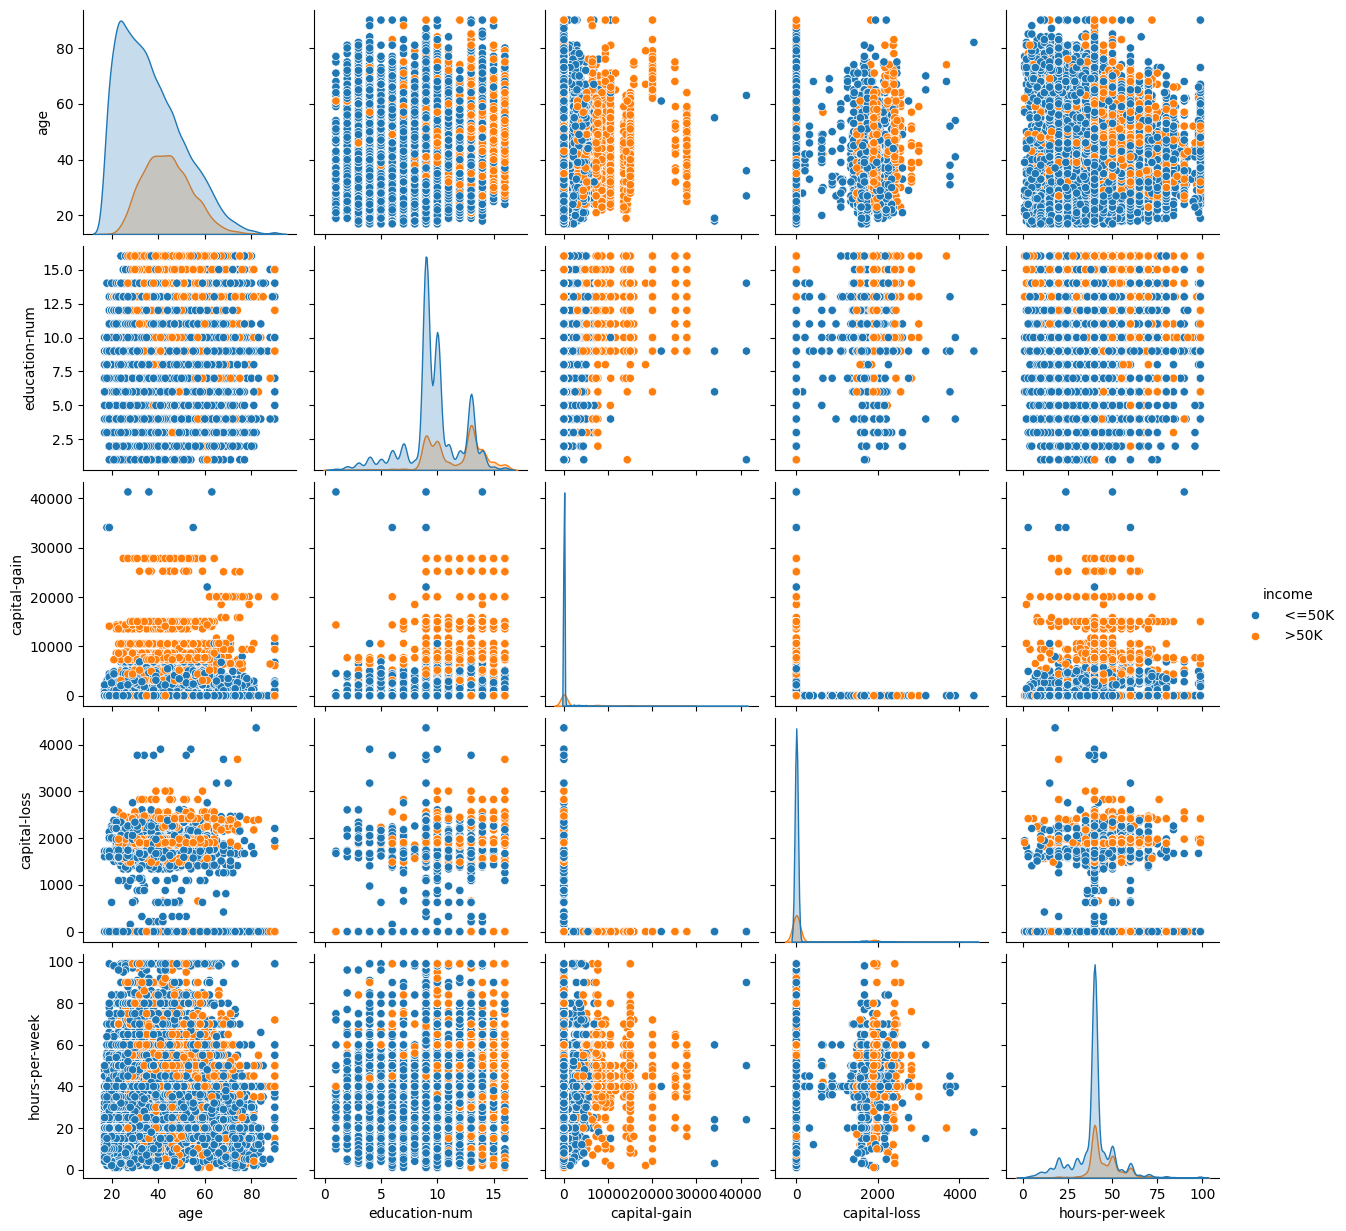

In [15]:
sns.pairplot(df_census, hue="income")

## 2. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(100, 20), dpi=300)


_ = tree.plot_tree(tree_clf,
                   feature_names=df_independent.columns,
                   class_names=df_dependent.columns, 
                   filled=True,
                   proportion = True,
                   fontsize=18)

In [18]:
y_predict_tree=tree_clf.predict(X_test)

In [19]:
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10099
           1       0.79      0.52      0.63      3390

    accuracy                           0.84     13489
   macro avg       0.82      0.74      0.76     13489
weighted avg       0.84      0.84      0.83     13489



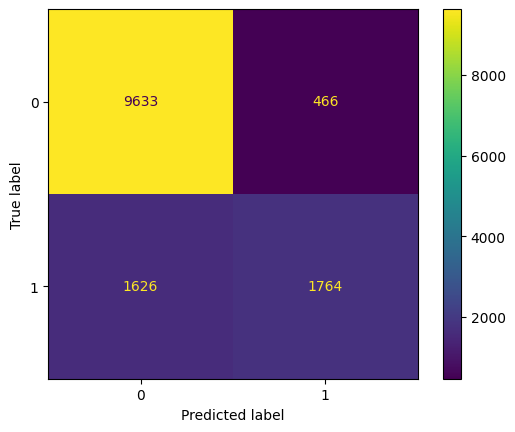

In [20]:
cm = confusion_matrix(y_test, y_predict_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp = disp.plot()
plt.show()

## SVM

In [21]:
from sklearn.svm import SVC

In [22]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_predict_SVC = clf.predict(X_test)

In [23]:
y_predict_SVC

array([0, 1, 1, ..., 0, 0, 0])

In [24]:
print(classification_report(y_test, y_predict_SVC))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10099
           1       0.82      0.57      0.67      3390

    accuracy                           0.86     13489
   macro avg       0.84      0.76      0.79     13489
weighted avg       0.86      0.86      0.85     13489



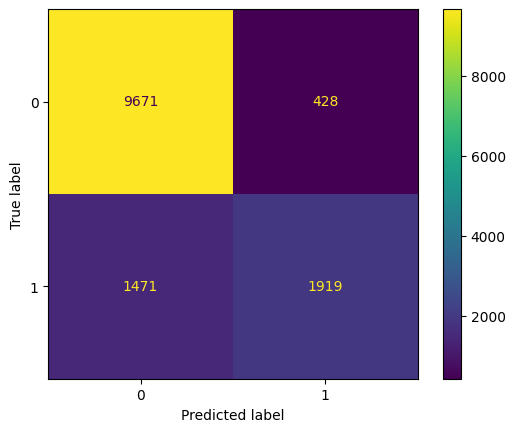

In [25]:
cm = confusion_matrix(y_test, y_predict_SVC, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp = disp.plot()
plt.show()